# 4. 신경망 학습
신경망이 학습할 수 있도록 해주는 지표인 손실함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.   

## 4.1 데이터에서 학습한다!

### 4.1.1 데이터 주도 학습
데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻.
규칙을 사람이 만드는 방식에서 기계가 데이터로부터 배우는 방식으로의 패러다임 전환.

### 4.1.2 훈련 데이터와 시험 데이터
훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾고,   
그 다음 시험데이터를 사용하여 훈련한 모델의 실력을 평가한다.
(오버피팅overfiting : 한 데이터 셋에만 지나치게 최적화된 현상)

## 4.2 손실 함수
신경망 학습에서 사용하는 지표는 손실함수 이다. 
일반적으로 오차제곱합과 교차 엔트로피 오차를 사용한다. 

4.2.1 오차제곱합
$$ E = {1\over2} \sum_k{(y_k - t_k)^2}$$


In [4]:
import numpy as np

In [5]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [7]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [8]:
# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

첫번 째 추정결과가 오차가 적으니 정답에 더 가까울 것으로 판단할 수 있다. 

### 4.2.2 교차 엔트로피 오차
$$E=-\sum_k{t_k}log{y_k}$$  
$log$는 밑이 $e$인 자연로그($log_e$)입니다. $y_k$는 신경망의 출력, $t_k$는 정답 레이블이다.   
$t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 (원-핫 인코딩)  
실질적으로 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식  
교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정한다.  

In [9]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta)) # delta : 아주 작은 값을 더해서 절대 0이 되지 않도록(마이너스무한대방지)

In [10]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [11]:
# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546


### 4.2.3 미니배치 학습  
훈련 데이터에 대한 손실함수 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾는다. 그럴려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다. 
(평균손실함수)
$$ E=-{{1}\over{N}}\sum_n\sum_k{t_{nk}}{log{y_{nk}}} $$   

손실함수계산을 데이터 일부를 추려 전체의 근사치로 이용 할 수 있다. 
훈련 데이터로부터 일부만 골라 학습 수행하는 것을 미니배치라 한다. 

In [14]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from scratch1.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [15]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [16]:
# 배치를 지원하는 교차 엔트로피 (정답레이블이 원-핫인코딩일 때)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshap(1, t.size)
        y = y.reshap(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7))/batch_size

In [19]:
# 배치를 지원하는 교차 엔트로피 (정답레이블이 숫자일 때)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshap(1, t.size)
        y = y.reshap(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7))/batch_size # p.119 이해 필요

In [ ]:
4.2.5 왜 손실 함수를 설정하는가?
정확도라는 지표를 놔두고 왜 손실함수의 값이라는 우회적인 방법을 택했을까? 미분의 역할에 주목해서...
가중치 매개변수의 손실 함수이 미분이란 '가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나'의 의미

## 4.3 수치 미분

### 4.3.1 미분
$${{df(x)}\over{dx}} = {\lim_{{h}\rightarrow{0}}{{f(x+h)-f(x)}\over{h}}}$$  
x의 작은 변화가 함수f(x)를 얼마나 변화시키느냐를 의미  

In [20]:
# 나쁜 예
def numerical_diff(f, x):
    h = 10e-50 #(32비트 부동소수점)에서 0.0되어 버린다. 
    return (f(x+h)-f(x))/h

In [22]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h)-f(x-h))/(2*h) 

중앙차분 : x를 중심으로 그 전후의 차분을 계산한다.   
해석적 미분은  $y=x^2$를 ${{dy}\over{dx}} = 2x$ 로 푼다.  
수치 미분 : 아주 작은 차분으로 미분하는 것   

### 4.3.2 수치 미분의 예
$y=0.01x^2+0.1x$를 코드로 표현하면 아래와 같다. 

In [23]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1*x

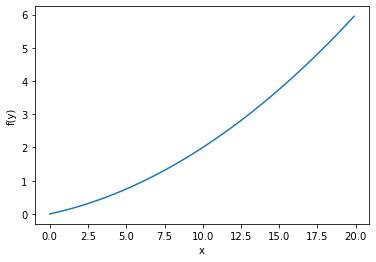

In [24]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(y)")
plt.plot(x,y)
plt.show()

In [26]:
numerical_diff(function_1, 5)

0.1999999999990898

In [27]:

numerical_diff(function_1, 10)

0.2999999999986347

### 4.3.3 편미분
변수 두개 $f(x_0, x_1)={x_0}^2 +{x_1}^2$

In [28]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

문제1: $x_0$ = 3, $x_1$ = 4일때, $x_0$에 대한 편미분 ${df}\over{dx_0}$를 구하라.

In [32]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [33]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

문제2: $x_0$ = 3, $x_1$ = 4일때, $x_1$에 대한 편미분 ${df}\over{dx_0}$를 구하라.

In [37]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [38]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기
모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 한다. 

In [45]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zero_like(x) #x와 같은 형상의 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val+h
        fxh1 = f(x)
        
        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [ ]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


*기울기가 가리키는 쪽은 각 장소에서 함수의 출력값을 가장 크게 줄이는 방향이다.*

### 4.4.1 경사법(경사 하강법)
- 손실함수가 최솟값이 될때가 최적의 매개변수라 할 수 있다.   
- 기울기를 잘 이용해 함수의 최솟값(또는 가능한한 가장 작은 값)을 찾으려는 것이 경사법이다.   
- 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.   
- 함수가 극솟값, 최솟값 또 안장점이 되는 장소에서는 기울기가 0 이다.  
- 최솟값이 아닌 극솟값, 안장점에서 학습이 진행되지 않는 정체기에 빠질 수 있다. (고원)   
- 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서 기울기를 구하고 기울어진 방향으로 나아가기를 반복한다.   
- 경사법 수식  (변수가 두개라 가정)
$$x_0 = x_0 -{\eta{{df}\over{dx_0}}}$$  
$$x_1 = x_1 -{\eta{{df}\over{dx_0}}}$$  
$\eta$는 갱신하는 양, 학습률(learning rate)

In [46]:
# 경사하강법 (step_num; 경사법에 따른 반복 횟수)
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)


In [ ]:

### 4.4.2 신경망에서의 기울기

## 4.5 학습 알고리즘 구현하기

4.5.1 2층 신경망 클래스 구현하기

4.5.2 미니배치 학습 구현하기

4.5.3 시험 데이터로 평가하기

## 4.6 정리

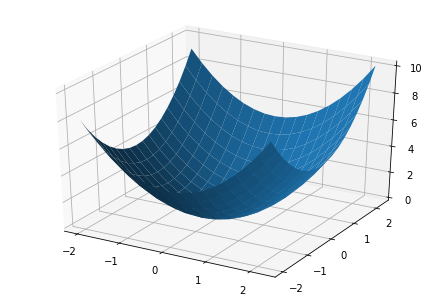

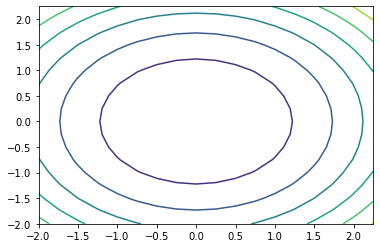

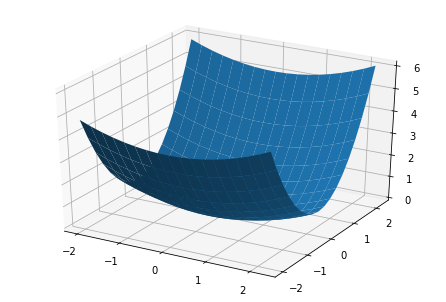

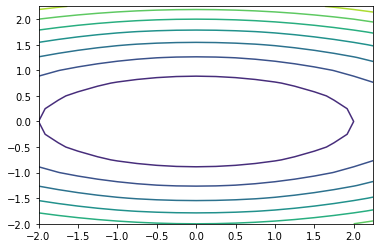

<ipython-input-4-549a59ac71bf>:33: RuntimeWarning: invalid value encountered in sqrt
  Z=np.sqrt(9-X**2-Y**2)
<ipython-input-4-549a59ac71bf>:36: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, Z)


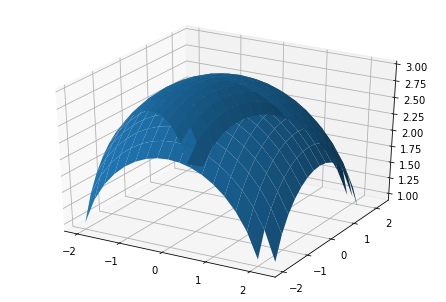

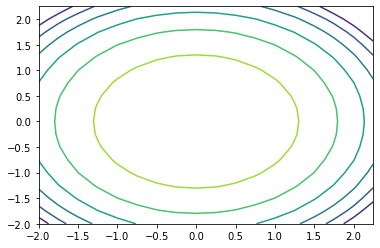

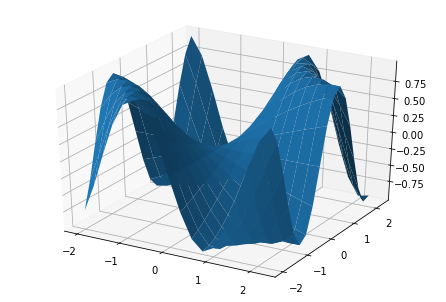

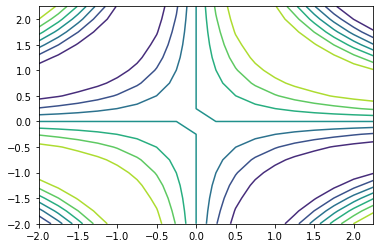

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  3 21:08:19 2020

@author: Han
"""

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


x = np.arange(-2, 2.5, 0.25)
y = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x, y)
Z=X**2+Y**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X,Y,Z)
plt.show()

Z=(1/5)*X**2+Y**2
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X,Y,Z)
plt.show()

Z=np.sqrt(9-X**2-Y**2)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X,Y,Z)
plt.show()

Z=np.sin(X*Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X,Y,Z)
plt.show()

## 정리하기
- 기계학습에서 사용하는 데이터셋은 훈련데이터와 시험데이터로 나눠사용한다.
- 훈련데이터로 학습, 시험데이터로 평가
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다. 
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다. 
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다. 
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다. 
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 
- 반면 오차역전파법은 기울기를 고속으로 구할 수 있다. 